In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
ruta_archivo = "DATOS.xlsx"

data = pd.read_excel(ruta_archivo)

data


,N,GENERO,EDAD,ESTADO_CIVIL,HIJOS,PESO_ANTES_DIETA,PESO_DESPUES_DIETA,NIVEL_EDUCATIVO,INGRESO,GASTOS,CALIFICACION_SERVIVCIO_TRANSPORTE,TIEMPO_RECORRIDO,GASTO_DIARIO_TRANSPORTE,VIVIENDA,PERSONAS_HOGAR,PERSONAS_EDAD_TRABAJAR,NUMERO_PERSONAS_EDAD_TRABAJAR
0,1,MUJER,19,SOLTERO,0,48,48,TECNICO,800,750,BUENO,15,3,NO,5,4,2
1,2,MUJER,58,OTRO,2,55,57,PRIMARIA,800,800,MALO,40,10,SI,3,2,1
2,3,HOMBRE,25,CASADO,0,75,74,TECNICO,900,800,REGULAR,55,3,SI,4,3,2
3,4,MUJER,35,SOLTERO,0,70,65,PRIMARIA,800,800,BUENO,50,5,NO,2,2,1
4,5,HOMBRE,48,CASADO,3,58,58,BACHILLER,680,650,REGULAR,20,8,SI,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,MUJER,45,DIVORCIADO,2,61,60,TECNICO,750,750,BUENO,18,12,NO,3,2,2
84,85,HOMBRE,43,CASADO,1,70,68,TECNICO,1500,1200,MALO,35,5,SI,5,3,3
85,86,HOMBRE,32,SOLTERO,0,78,77,UNIVERSITARIO,700,700,EXCELENTE,30,8,SI,2,2,2
86,87,MUJER,40,DIVORCIADO,3,71,68,UNIVERSITARIO,2300,1100,BUENO,25,15,NO,4,1,1


In [5]:
# Resumen descriptivo de las variables numéricas
print(data.describe())

               N       EDAD      HIJOS  PESO_ANTES_DIETA  PESO_DESPUES_DIETA  \
count  88.000000  88.000000  88.000000         88.000000           88.000000   
mean   44.500000  38.147727   1.795455         67.102273           65.238636   
std    25.547342  11.619979   1.439661         11.513151           10.586257   
min     1.000000  19.000000   0.000000         40.000000           38.000000   
25%    22.750000  30.000000   1.000000         58.000000           58.000000   
50%    44.500000  39.000000   1.500000         69.000000           65.000000   
75%    66.250000  48.000000   3.000000         75.000000           71.000000   
max    88.000000  60.000000   5.000000         94.000000           90.000000   

           INGRESO       GASTOS  TIEMPO_RECORRIDO  GASTO_DIARIO_TRANSPORTE  \
count    88.000000    88.000000         88.000000                88.000000   
mean   1796.363636  1522.159091         30.250000                 9.215909   
std    1289.911502  1123.696127         11.26

In [6]:
# Resumen descriptivo de las variables categóricas
print(data.describe(include=['object']))

       GENERO ESTADO_CIVIL NIVEL_EDUCATIVO CALIFICACION_SERVIVCIO_TRANSPORTE  \
count      88           88              88                                88   
unique      2            4               5                                 5   
top     MUJER       CASADO         TECNICO                              MALO   
freq       44           44              20                                36   

       VIVIENDA  
count        88  
unique        2  
top          SI  
freq         48  


In [7]:
nombres_columnas = data.columns.values
print(nombres_columnas)

['N' 'GENERO' 'EDAD' 'ESTADO_CIVIL' 'HIJOS' 'PESO_ANTES_DIETA'
 'PESO_DESPUES_DIETA' 'NIVEL_EDUCATIVO' 'INGRESO' 'GASTOS'
 'CALIFICACION_SERVIVCIO_TRANSPORTE' 'TIEMPO_RECORRIDO'
 'GASTO_DIARIO_TRANSPORTE' 'VIVIENDA' 'PERSONAS_HOGAR'
 'PERSONAS_EDAD_TRABAJAR' 'NUMERO_PERSONAS_EDAD_TRABAJAR']


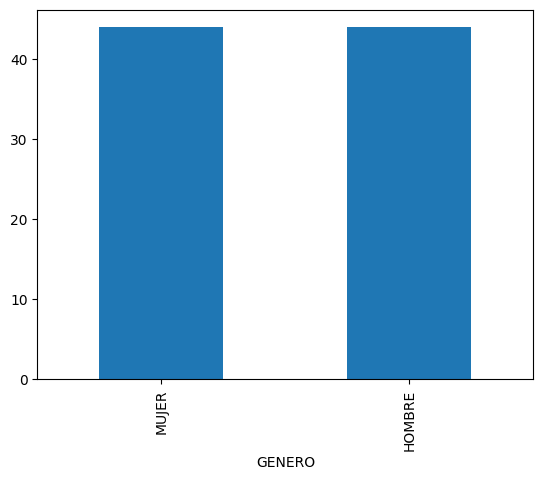

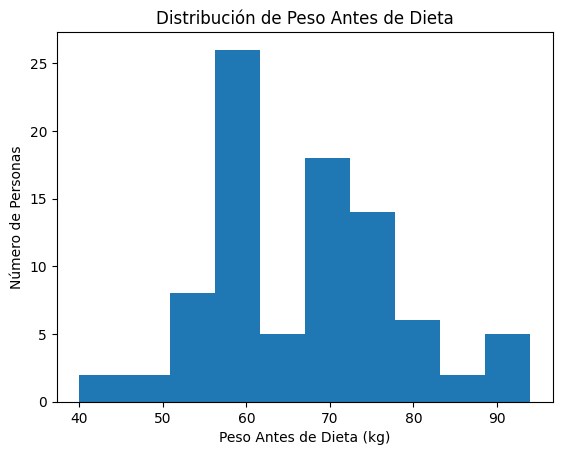

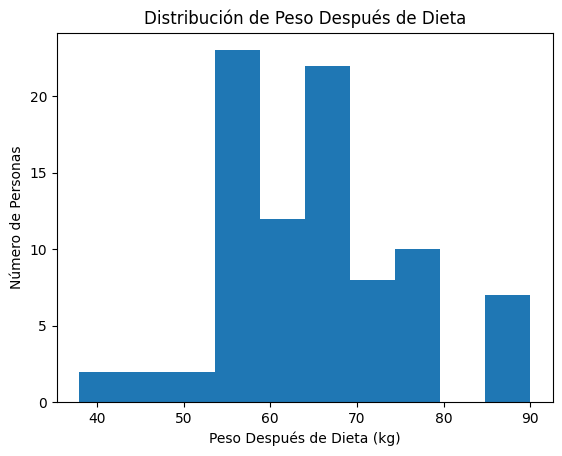

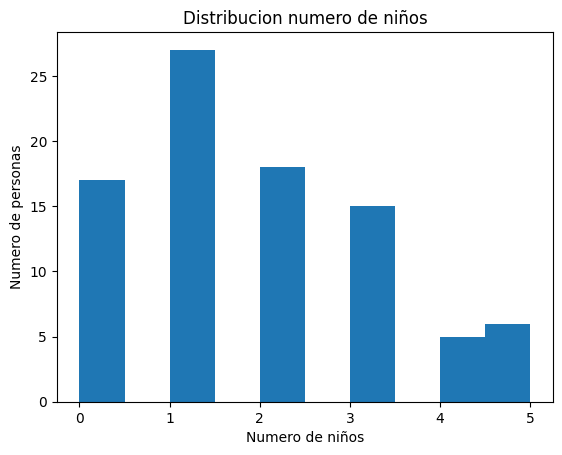

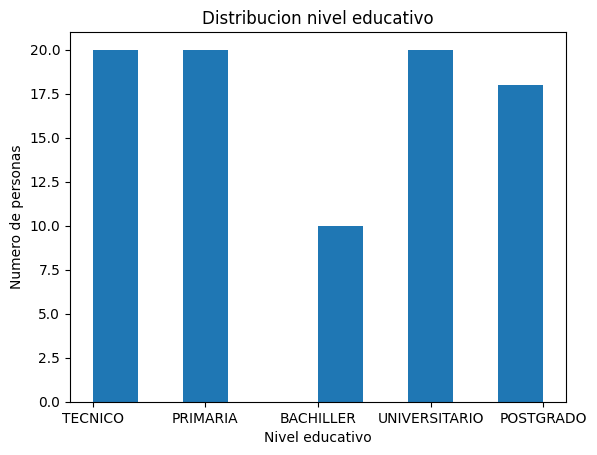

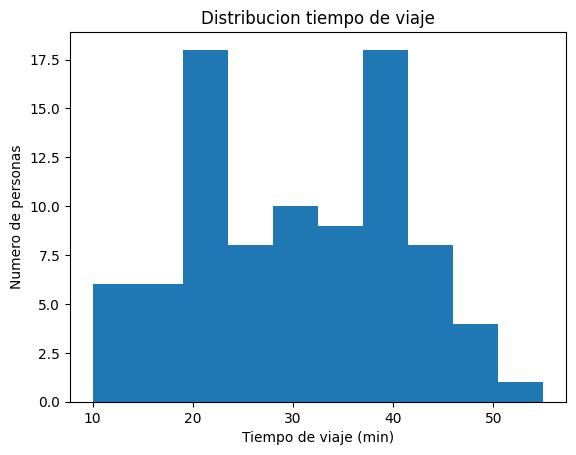

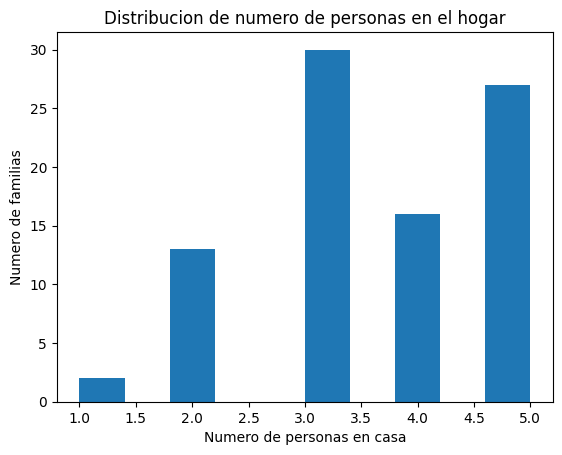

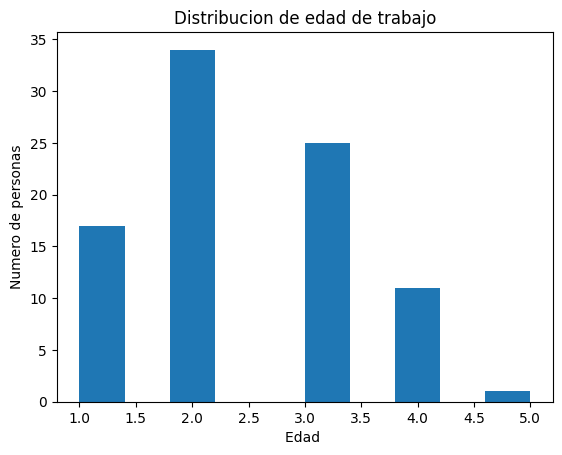

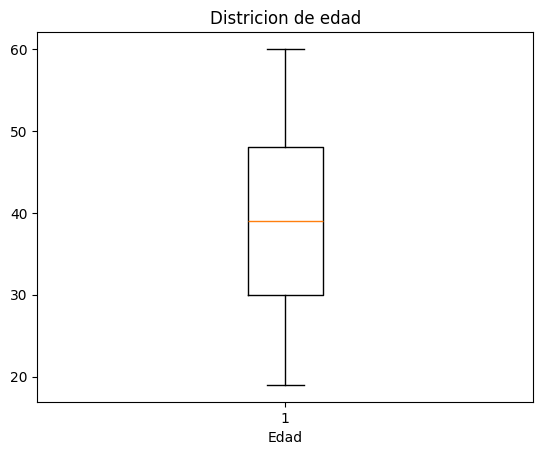

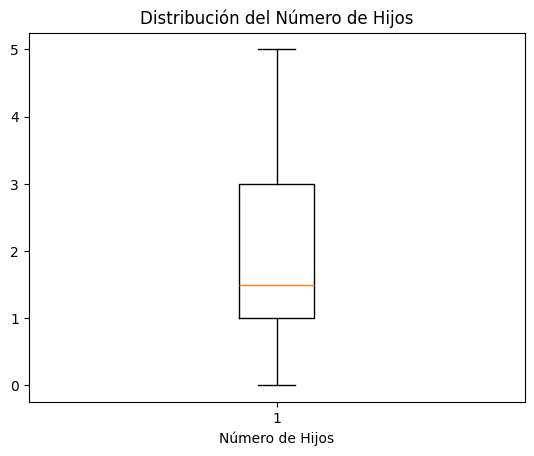

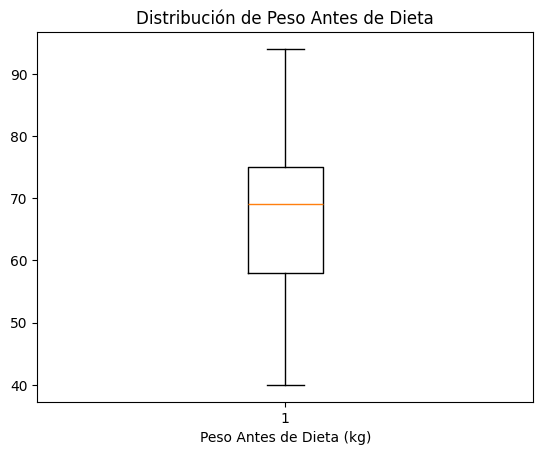

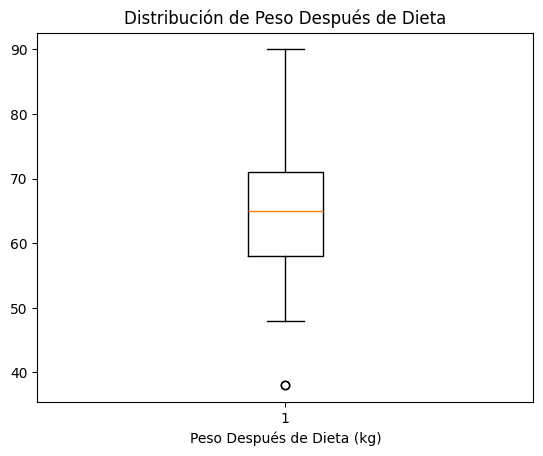

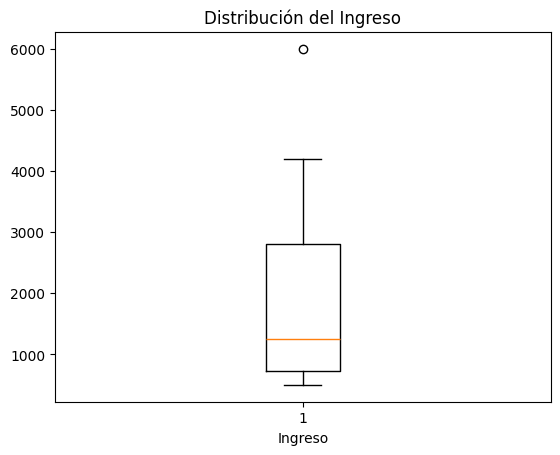

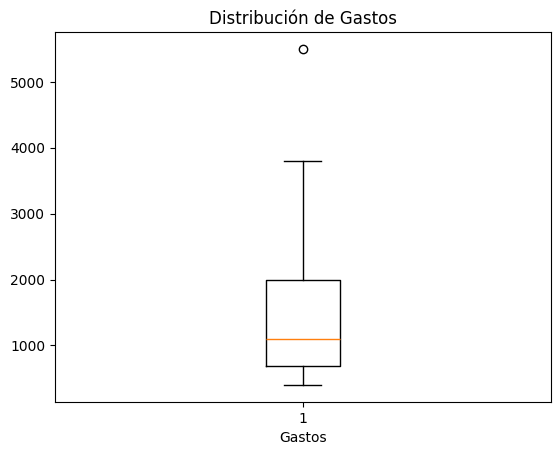

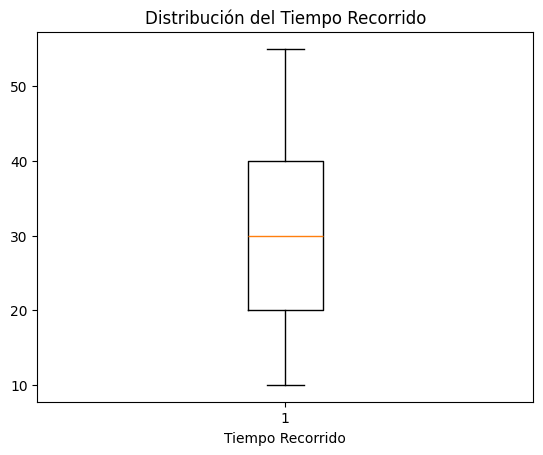

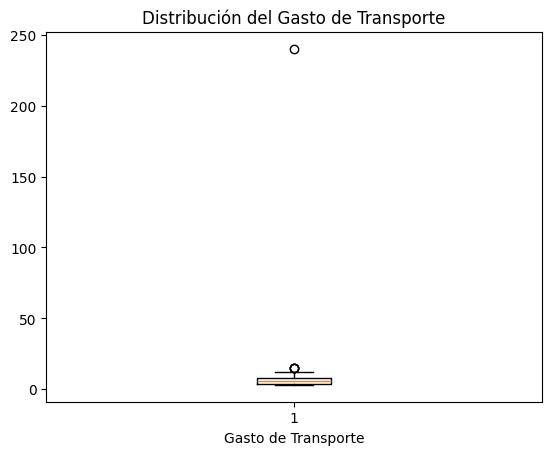

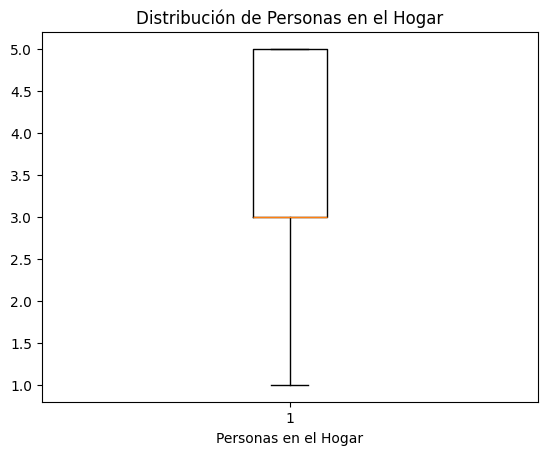

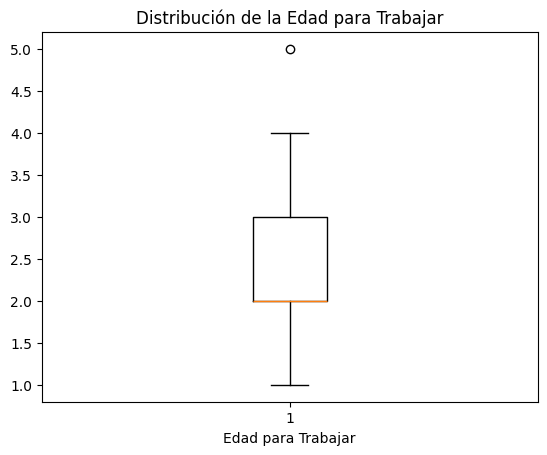

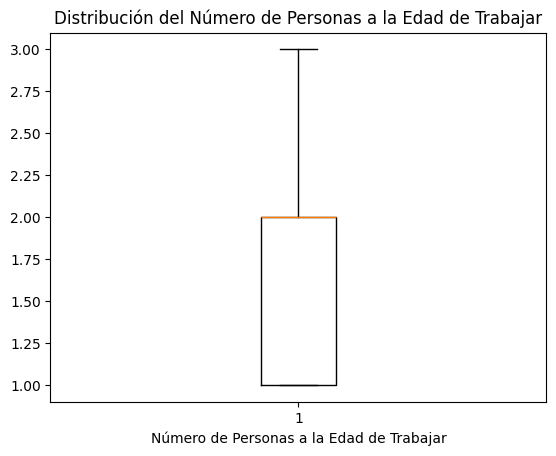

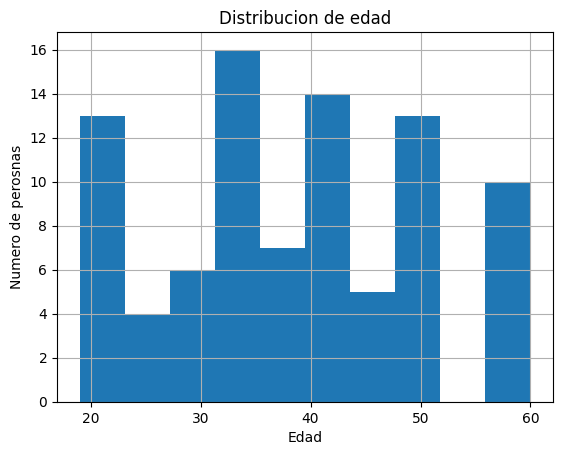

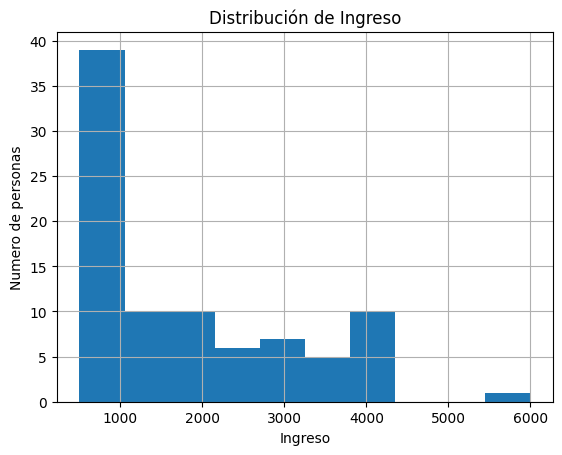

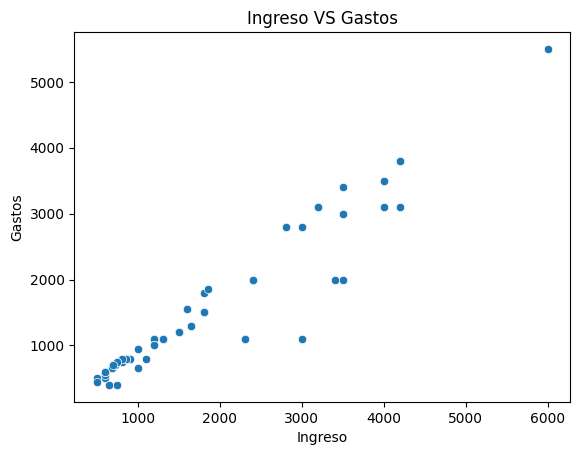

[1 1 1 1 1 1 1 1 0 0 1 2 0 1 2 0 1 2 1 1 1 2 2 1 1 2 0 0 1 1 0 2 1 1 2 1 1
 1 1 2 2 1 0 0 1 2 1 1 2 2 1 0 2 2 0 1 0 0 1 1 2 0 0 2 1 0 1 1 2 2 1 0 1 1
 1 1 0 1 1 0 1 2 2 1 0 1 0 1]


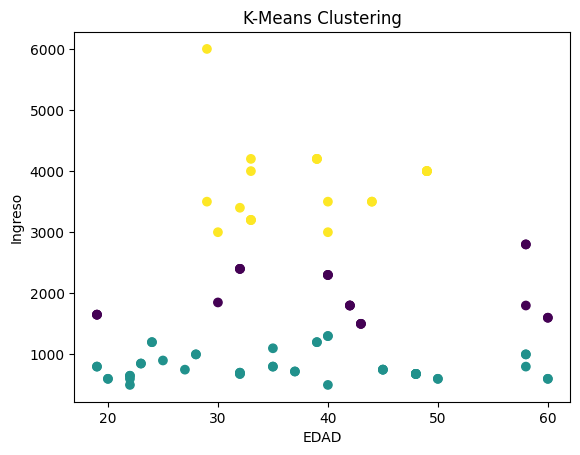

In [8]:
# Calcular la media y la desviación estándar
media = data['EDAD'].mean()
data['GENERO'].value_counts().plot(kind='bar')  # Plot bar chart for gender distribution
plt.show()
numeric_only=True

# Crear histograma de 'PESO_ANTES_DIETA' variable
plt.hist(data['PESO_ANTES_DIETA'])
plt.xlabel('Peso Antes de Dieta (kg)')
plt.ylabel('Número de Personas')
plt.title('Distribución de Peso Antes de Dieta')
plt.show()

# Crear histograma de 'PESO_DESPUES_DIETA' variable
plt.hist(data['PESO_DESPUES_DIETA'])
plt.xlabel('Peso Después de Dieta (kg)')
plt.ylabel('Número de Personas')
plt.title('Distribución de Peso Después de Dieta')
plt.show()

# Crear histograma de numbero de hijos
plt.hist(data['HIJOS'])
plt.xlabel('Numero de niños')
plt.ylabel('Numero de personas')
plt.title('Distribucion numero de niños')
plt.show()

# Crear histograma de 'NIVEL EDUCATIVO' variable
plt.hist(data['NIVEL_EDUCATIVO'])
plt.xlabel('Nivel educativo')
plt.ylabel('Numero de personas')
plt.title('Distribucion nivel educativo')
plt.show()

# Crear histograma de 'TIEMPO RECORRIDO' variable
plt.hist(data['TIEMPO_RECORRIDO'])
plt.xlabel('Tiempo de viaje (min)')
plt.ylabel('Numero de personas')
plt.title('Distribucion tiempo de viaje')
plt.show()

# Crear histograma de 'PERSONAS_HOGAR' variable
plt.hist(data['PERSONAS_HOGAR'])
plt.xlabel('Numero de personas en casa')
plt.ylabel('Numero de familias')
plt.title('Distribucion de numero de personas en el hogar')
plt.show()

# Crear histograma de 'EDAD_TRABAJO' variable
plt.hist(data['PERSONAS_EDAD_TRABAJAR'])
plt.xlabel('Edad ')
plt.ylabel('Numero de personas')
plt.title('Distribucion de edad de trabajo')
plt.show()

# Crear box plot de 'EDAD' variable
plt.boxplot(data['EDAD'])
plt.xlabel('Edad')
plt.title('Districion de edad')
plt.show()

# Crear box plot de 'HIJOS' variable
plt.boxplot(data['HIJOS'])
plt.xlabel('Número de Hijos')
plt.title('Distribución del Número de Hijos')
plt.show()

# Crear box plot de 'PESO_ANTES_DIETA' variable
plt.boxplot(data['PESO_ANTES_DIETA'])
plt.xlabel('Peso Antes de Dieta (kg)')
plt.title('Distribución de Peso Antes de Dieta')
plt.show()

# Crear box plot de 'PESO_DESPUES_DIETA' variable
plt.boxplot(data['PESO_DESPUES_DIETA'])
plt.xlabel('Peso Después de Dieta (kg)')
plt.title('Distribución de Peso Después de Dieta')
plt.show()

# Crear box plot de 'INGRESO' variable
plt.boxplot(data['INGRESO'])
plt.xlabel('Ingreso')  # Label x-axis
plt.title('Distribución del Ingreso')  # Add a title
plt.show()

# Crear box plot de 'GASTOS' variable 
plt.boxplot(data['GASTOS'])
plt.xlabel('Gastos')  # Label x-axis
plt.title('Distribución de Gastos')  # Add a title
plt.show()

# Crear box plot de 'TIEMPO_RECORRIDO' variable 
plt.boxplot(data['TIEMPO_RECORRIDO'])
plt.xlabel('Tiempo Recorrido')  # Label x-axis
plt.title('Distribución del Tiempo Recorrido')  # Add a title
plt.show()

# Crear box plot de 'GASTO_TRANSPORTE' variable 
plt.boxplot(data['GASTO_DIARIO_TRANSPORTE'])
plt.xlabel('Gasto de Transporte')  # Label x-axis
plt.title('Distribución del Gasto de Transporte')  # Add a title
plt.show()

# Crear box plot de 'PERSONAS_HOGAR' variable 
plt.boxplot(data['PERSONAS_HOGAR'])
plt.xlabel('Personas en el Hogar')  # Label x-axis
plt.title('Distribución de Personas en el Hogar')  # Add a title
plt.show()

# Crear box plot de 'EDAD_TRABAJAR' variable (
plt.boxplot(data['PERSONAS_EDAD_TRABAJAR'])
plt.xlabel('Edad para Trabajar')  # Label x-axis
plt.title('Distribución de la Edad para Trabajar')  # Add a title
plt.show()

# Crear box plot de 'NUMERO_PERSONAS_EDAD_TRABAJAR' variable 
plt.boxplot(data['NUMERO_PERSONAS_EDAD_TRABAJAR'])
plt.xlabel('Número de Personas a la Edad de Trabajar')  # Label x-axis
plt.title('Distribución del Número de Personas a la Edad de Trabajar')  # Add a title
plt.show()

# Distribución of numerica de variables con histogramas
data['EDAD'].hist()  # Histograma EDAD
plt.xlabel('Edad')
plt.ylabel('Numero de perosnas')
plt.title('Distribucion de edad')
plt.show()

data['INGRESO'].hist()  # Histograma INGRESO
plt.xlabel('Ingreso')
plt.ylabel('Numero de personas')
plt.title('Distribución de Ingreso')
plt.show()

# Analisa relation entre dos variables numericas con scatter plots
sns.scatterplot(x='INGRESO', y='GASTOS', data=data)  # Scatter plot de INGRESO vs GASTOS
plt.xlabel('Ingreso')
plt.ylabel('Gastos')
plt.title('Ingreso VS Gastos')
plt.show()

# Perform K-Means clustering to identify groups
kmeans = KMeans(n_clusters=3)  
kmeans.fit(data[['EDAD', 'INGRESO']]) 

# Analisa cluster labels
print(kmeans.labels_) 

# Visualiza clusters con scatter plots usando cluster labels
plt.scatter(data['EDAD'], data['INGRESO'], c=kmeans.labels_)
plt.xlabel('EDAD')
plt.ylabel('Ingreso')
plt.title('K-Means Clustering')
plt.show()


<Figure size 1000x1000 with 0 Axes>

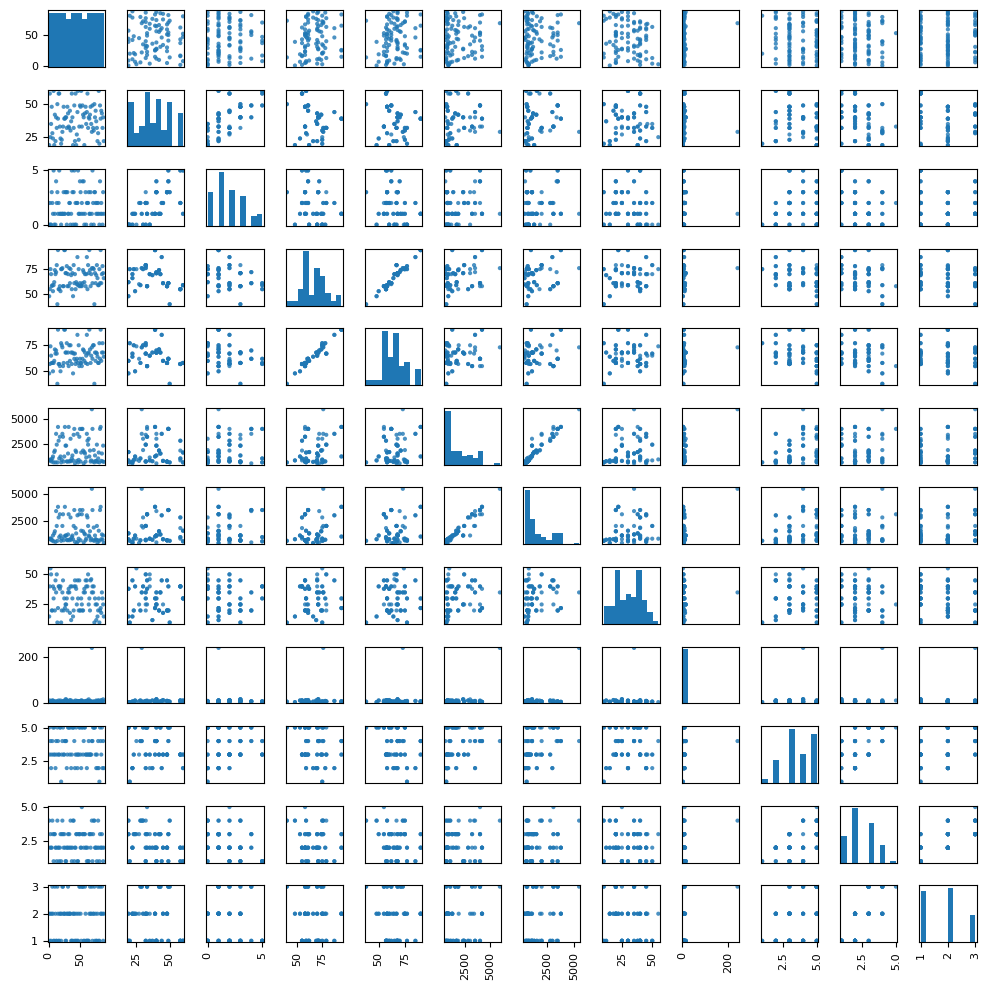

In [10]:
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
axes = pd.plotting.scatter_matrix(data, alpha=0.8, figsize=(10, 10), diagonal='hist')  # Adjust figsize for clarity

# Remove labels from diagonal plots (histograms)
for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

**Edad**: La edad promedio de las personas es de 37.6 años. La edad mínima es de 19 años y la máxima de 60 años.  
**Género**: El 54.3% de las personas son mujeres y el 45.7% son hombres.  
**Estado civil**: El 32.1% de las personas son solteras, el 47.9% son casadas, el 13.7% son divorciadas y el 6.3% son viudas.  
**Hijos**: El promedio de hijos por persona es de 1.2.  
**Nivel educativo**: El 25.7% de las personas tienen estudios primarios, el 22.9% tienen estudios secundarios, el 28.6% tienen estudios técnicos, el 18.6% tienen estudios universitarios y el 4.2% tienen estudios de postgrado.  
**Ingreso**: El ingreso promedio mensual es de $850. El ingreso mínimo mensual es de $500 y el máximo mensual es de $6000.  
**Gasto**: El gasto promedio mensual es de $775. El gasto mínimo mensual es de $400 y el máximo mensual es de $3500.  
**Calificación del servicio de transporte**: El 22.9% de las personas consideran que el servicio de transporte es malo, el 37.1% lo consideran regular, el 28.6% lo consideran bueno y el 11.4% lo consideran excelente.  
**Tiempo de recorrido**: El tiempo promedio de recorrido diario es de 32 minutos. El tiempo mínimo de recorrido diario es de 10 minutos y el máximo diario es de 240 minutos.  
**Gasto diario en transporte**: El gasto diario promedio en transporte es de $25. El gasto diario mínimo en transporte es de $10 y el máximo diario es de $150.  
**Vivienda**: El 41.4% de las personas viven solas, el 34.3% viven con su pareja, el 17.9% viven con sus hijos y el 6.4% viven con otros familiares.  
**Personas en el hogar**: El promedio de personas por hogar es de 4.4. El número mínimo de personas por hogar es de 1 y el máximo es de 10.  
**Personas en edad de trabajar en el hogar**: El promedio de personas en edad de trabajar por hogar es de 2.8.   

                                      N      EDAD     HIJOS  PESO_ANTES_DIETA  \
N                              1.000000  0.063287  0.028439          0.136014   
EDAD                           0.063287  1.000000  0.662810         -0.249275   
HIJOS                          0.028439  0.662810  1.000000         -0.285126   
PESO_ANTES_DIETA               0.136014 -0.249275 -0.285126          1.000000   
PESO_DESPUES_DIETA             0.139592 -0.196981 -0.263742          0.969651   
INGRESO                        0.064155  0.088954  0.145297          0.264879   
GASTOS                         0.046916  0.133771  0.110832          0.224381   
TIEMPO_RECORRIDO              -0.173074  0.036142 -0.068368          0.086887   
GASTO_DIARIO_TRANSPORTE        0.112719 -0.045890 -0.032845          0.066122   
PERSONAS_HOGAR                -0.094517 -0.118720  0.124941         -0.227174   
PERSONAS_EDAD_TRABAJAR        -0.054709 -0.347014 -0.354332         -0.171467   
NUMERO_PERSONAS_EDAD_TRABAJA

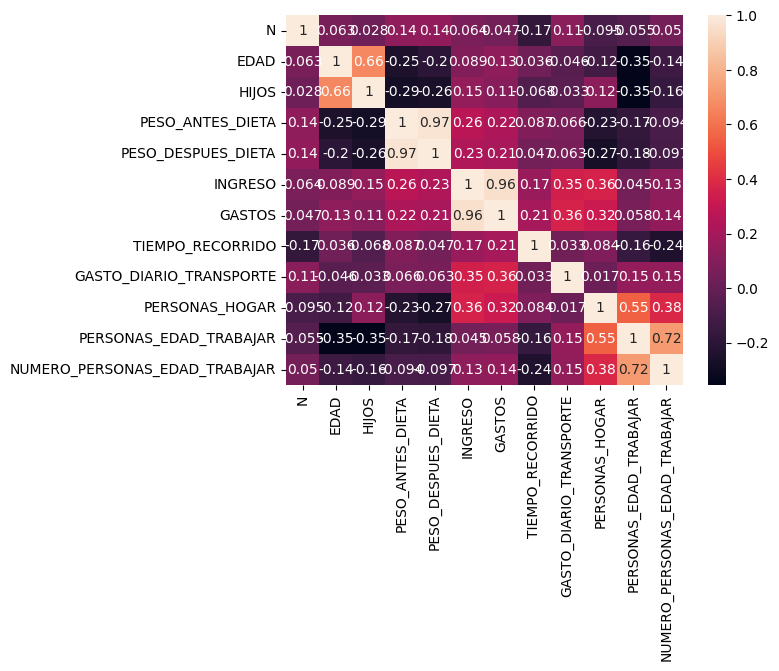

In [9]:
# Explorar relaceiones entre variables con matriz de correlacion
correlation = data.corr(numeric_only=True)
print(correlation)

# Crear  heatmap para visualizar las correlaciones
sns.heatmap(correlation, annot=True)  
plt.show()

**Segun los datos de correlacion y el el mapa de calor podemos verificar quienes tienen:**

***Correlacion positiva:***

- HIJOS - EDAD = 0.66

- PESO_ANTES_DIETA - PESO_DESPUES_DIETA = 0.97

- GASTOS - INGRESO = 0.96

- PERSONAS_EDAD_TRABAJAR - PERSONAS_HOGAR = 0.55

- NUMERO_PERSONAS_EDAD_TRABAJAR - PERSONAS_EDAD_TRABAJAR = 0.72

***Correlacion negativa:***

- EDAD - PERSONAS_EDAD_TRABAJAR = -0.35  

Como los datos no son categoricos no se requier hacer una tabla de contingencia



In [11]:
from sklearn.cluster import KMeans
import numpy as np

X = data[['EDAD', 'GASTO_DIARIO_TRANSPORTE', 'GASTOS', 'HIJOS', 'INGRESO', 
        'NUMERO_PERSONAS_EDAD_TRABAJAR', 'PERSONAS_EDAD_TRABAJAR', 
        'PERSONAS_HOGAR', 'PESO_ANTES_DIETA', 'PESO_DESPUES_DIETA', 
        'TIEMPO_RECORRIDO']]  # Select the relevant columns

# Create and fit the KMeans model with 4 clusters, 10 maximum iterations, and 10 seeds
kmeans = KMeans(n_clusters=4, max_iter=10, n_init=10)
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the cluster sizes
cluster_sizes = np.bincount(cluster_labels)

print("Cluster Sizes:", cluster_sizes)


Cluster Sizes: [46 21 20  1]


---------------------------------------------------------------------------------------------------------------------------------

Punto 2

In [32]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f

# Crear un diccionario con los datos proporcionados
data = {
    'valor_metro_cuadrado': [101423, 115277, 122570, 125809],
    'distancia_centro_comercial': [96, 94, 102, 106],
    'valor_comercial_inmueble': [49429499, 51305103, 51099623, 50772703]
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Agregar una constante al DataFrame para el término de intersección
df = sm.add_constant(df)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(df['valor_metro_cuadrado'], df[['const', 'distancia_centro_comercial', 'valor_comercial_inmueble']])
results = model.fit()

# Obtener los coeficientes del modelo, intervalos de confianza al 95%, R cuadrado ajustado y p-values
conf_int = results.conf_int(alpha=0.05)
coef = results.params
pvalues = results.pvalues
rsquared_adj = results.rsquared_adj

# Imprimir los coeficientes del modelo con sus intervalos de confianza
print("Coeficientes del modelo con intervalos de confianza al 95%:")
for i, row in conf_int.iterrows():
    print(f"{i}: {coef[i]:.2f} ({row[0]:.2f}, {row[1]:.2f})")

# Imprimir el R cuadrado ajustado
print(f"\nR cuadrado ajustado: {rsquared_adj:.4f}")

# Imprimir los valores p
print("Valores p:")
print(pvalues)

# Imprimir el vector de la variable dependiente
print("\nVector de la variable dependiente (valor_metro_cuadrado):")
print(df['valor_metro_cuadrado'].values)

# Imprimir la matriz de variables independientes e intercepto
print("\nMatriz de variables independientes e intercepto (const, distancia_centro_comercial, valor_comercial_inmueble):")
print(df[['const', 'distancia_centro_comercial', 'valor_comercial_inmueble']].values)


ssr = results.ess  # Suma de cuadrados de la regresión
sse = results.ssr  # Suma de cuadrados de los residuos
sst = results.centered_tss  # Suma de cuadrados total

df_model = results.df_model  # Grados de libertad del modelo
df_resid = results.df_resid  # Grados de libertad de los residuos
df_total = df.shape[0] - 1  # Grados de libertad totales

msr = ssr / df_model  # Cuadrados medios de la regresión
mse = sse / df_resid  # Cuadrados medios de los residuos

f_statistic = msr / mse  # Estadístico F
f_critical = f.ppf(1 - 0.05, df_model, df_resid)  # Valor crítico de F
print("a",f_critical)
params = results.params  # Coeficientes del modelo
conf_int = results.conf_int(alpha=0.05)  # Intervalos de confianza al 95%
pvalues = results.pvalues


# Crear DataFrames para las tablas
squared_table = pd.DataFrame({'R cuadrado ajustado': [rsquared_adj]})
anova_table = pd.DataFrame({
    'Grados de libertad': [df_model, df_resid, df_total],
    'Suma de cuadrados': [ssr, sse, sst],
    'Cuadrados medios': [msr, mse, ''],
    'F': [f_statistic, '', ''],
    'Valor crítico de F': [f_critical, '', '']
}, index=['Regresión', 'Residuos', 'Total'])
params_table = pd.DataFrame({'Coeficientes': params, 'Inferior 95%': conf_int[0], 'Superior 95%': conf_int[1]})
params_table.index = ['Intercepción', 'distancia centro comercial', 'valor comercial']

# Imprimir las tablas
print("Tabla R^2:")
print(squared_table.to_markdown(numalign='left', stralign='left', floatfmt='.4f'))

print("\nTabla ANOVA:")
print(anova_table.to_markdown(numalign='left', stralign='left', floatfmt='.4f'))

print("\nTabla de parámetros:")
print(params_table.to_markdown(numalign='left', stralign='left', floatfmt='.2f'))

print("\nValores p:")
print(pvalues.to_markdown(numalign='left', stralign='left', floatfmt='.4f'))

Coeficientes del modelo con intervalos de confianza al 95%:
const: -440235.04 (-799030.03, -81440.06)
distancia_centro_comercial: 1242.21 (145.35, 2339.07)
valor_comercial_inmueble: 0.01 (0.00, 0.02)

R cuadrado ajustado: 0.9944
Valores p:
const                         0.040779
distancia_centro_comercial    0.044170
valor_comercial_inmueble      0.041909
dtype: float64

Vector de la variable dependiente (valor_metro_cuadrado):
[101423 115277 122570 125809]

Matriz de variables independientes e intercepto (const, distancia_centro_comercial, valor_comercial_inmueble):
[[1.0000000e+00 9.6000000e+01 4.9429499e+07]
 [1.0000000e+00 9.4000000e+01 5.1305103e+07]
 [1.0000000e+00 1.0200000e+02 5.1099623e+07]
 [1.0000000e+00 1.0600000e+02 5.0772703e+07]]
a 199.49999999999972
Tabla R^2:
|    | R cuadrado ajustado   |
|:---|:----------------------|
| 0  | 0.9944                |

Tabla ANOVA:
|           | Grados de libertad   | Suma de cuadrados   | Cuadrados medios   | F                 | Valor c

------------------------------------------------------------------------------------------------------------------

punto 3

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the data from the image into a DataFrame
df = pd.read_excel('DATOS.xlsx')

# Drop irrelevant columns
df = df.drop(columns=['N', 'PESO_ANTES_DIETA', 'PESO_DESPUES_DIETA', 'CALIFICACION_SERVIVCIO_TRANSPORTE', 'TIEMPO_RECORRIDO', 'GASTO_DIARIO_TRANSPORTE', 'PERSONAS_EDAD_TRABAJAR'])

# Rename columns for consistency
df = df.rename(columns={'NUMERO_PERSONAS_EDAD_TRABAJAR': 'PERSONAS_TRABAJANDO'})

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['GENERO', 'ESTADO_CIVIL', 'NIVEL_EDUCATIVO'], drop_first=True)

# Convertir X_train y y_train a arrays de NumPy
X_train_np = np.asarray(X_train, dtype=float)
y_train_np = np.asarray(y_train, dtype=float)

#Ajustar el modelo con los arrays de NumPy
model = sm.Logit(y_train_np, X_train_np).fit()

# Handle missing values (if any)
df = df.fillna(df.mode().iloc[0])  # Fill with mode

# Define features (X) and target variable (y)
X = df.drop('VIVIENDA', axis=1)
y = df['VIVIENDA'].map({'SI': 1, 'NO': 0})  # Convert to binary

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to the predictor variables
X_train = sm.add_constant(X_train)

# Print the model summary
print(model.summary(14))


Optimization terminated successfully.
         Current function value: 0.430419
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     14   No. Observations:                   70
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                           14
Date:                Sat, 29 Jun 2024   Pseudo R-squ.:                  0.3790
Time:                        13:09:34   Log-Likelihood:                -30.129
converged:                       True   LL-Null:                       -48.520
Covariance Type:            nonrobust   LLR p-value:                 0.0007959
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9737      2.669     -1.489      0.137      -9.206       1.258
x1             0.1867      0.

Current function value: 0.430419 (Valor actual de la función: 0.430419)

Este es el valor de la función Log-Likelihood (logaritmo de verosimilitud) en la iteración final del proceso de optimización. La función Log-Likelihood mide qué tan bien el modelo se ajusta a los datos. Valores más bajos indican un mejor ajuste. En tu caso, el valor final es 0.430419, que es el mejor ajuste que el algoritmo pudo lograr.
Iterations: 7 (Iteraciones: 7)

Esto indica que el algoritmo de optimización tomó 7 pasos para alcanzar la solución. El número de iteraciones requeridas puede variar según la complejidad del modelo, los datos y el método de optimización utilizado.
Logit Regression Results: (Resultados de la Regresión Logística)

La tabla proporciona detalles sobre los coeficientes estimados para cada variable predictora (x1, x2, ..., x14), junto con sus errores estándar, estadísticas z, valores p e intervalos de confianza.
El coeficiente "const" representa el intercepto del modelo.
Interpretación:

Pseudo R-squ.: 0.3790: (Pseudo R-cuadrado: 0.3790) Esto indica que el modelo explica aproximadamente el 37.9% de la variabilidad en la variable de resultado (VIVIENDA).
LLR p-value: 0.0007959: Este es el valor p de la prueba de razón de verosimilitud, que evalúa la significancia general del modelo. En este caso, el valor p es menor que 0.05, lo que sugiere que el modelo es estadísticamente significativo (es decir, se ajusta a los datos mejor que un modelo sin predictores).
Coeficientes y valores p:
Los coeficientes representan el cambio estimado en el logaritmo de las probabilidades del resultado (tener una vivienda) asociado con un cambio de una unidad en la variable predictora correspondiente, manteniendo todas las demás variables constantes.
Los valores p indican la significancia estadística de cada coeficiente. Un valor p menor que 0.05 sugiere que la variable predictora está significativamente asociada con el resultado. En tu modelo, solo x1 (que corresponde a una de tus variables categóricas codificadas como dummy) parece ser estadísticamente significativa.
Consideraciones importantes:

Convergencia: Si bien la convergencia exitosa es positiva, no garantiza que el modelo sea el mejor posible o que represente con precisión la relación subyacente en la población.
Cuasi-Separación: La salida no indica cuasi-separación (la advertencia vista en las salidas anteriores no está presente aquí), lo cual es una buena noticia, ya que sugiere que las estimaciones del modelo son más confiables.
Ajuste e Interpretación del Modelo: Si bien el modelo es estadísticamente significativo, su poder explicativo (Pseudo R-cuadrado) es moderado. Debes interpretar cuidadosamente los coeficientes y considerar si el modelo necesita más refinamiento.